# [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)

## Transforming DataFrames

- Tabular data is the most common form for storing data for analysis.  
- In pandas, rectangular data is represented as a `DataFrame` object.  
- Every value within a column has the same data type, either text or numeric, but different columns can contain different data types.  


### Common Methods for Exploring DataFrames

- [`.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head): return the first n rows of the DataFrame.  
- [`.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail): return the last n rows of the DataFrame.  
- [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html): print information about a DataFrame including the index dtype and columns, non-null values and memory usage.  
- [`.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html): return a tuple representing the dimensionality of the DataFrame.    
- [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=pandas%20dataframe%20describe#):  generate descriptive statistics.
- [`.values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html): return a Numpy representation of the DataFrame.  
- [`.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html): return the column labels of the DataFrame.  
- [`.index`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html): return the index (row labels) of the DataFrame.  

In [1]:
# Import datetime library
from datetime import datetime

# Store todays date into "today_is"
today_is = datetime.today()

# Convert datetime objecto into a string
today_is_str = datetime.strftime(today_is, '%d-%m-%y')

# Create file path and store it as a string
file_path = str('/Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/Monefy.Data.' + str(today_is_str) + '.csv')

### Inspecting a DataFrame  

In [2]:
# Import pandas package with alias "pd"
import pandas as pd

# Read CSV file
cash_flow = pd.read_csv(file_path)

In [3]:
# Print the first 3 rows of the DataFrame
print(cash_flow.head(3))

         date   account         category  amount currency converted amount  \
0  01/08/2021  Ingresos         Despensa     -15      MXN              -15   
1  01/08/2021  Ingresos  Restaurante/Bar     -50      MXN              -50   
2  01/08/2021  Ingresos        Depósitos  610.02      MXN           610.02   

  currency.1      description  
0        MXN    Fruta cortada  
1        MXN  1 Mazapán latte  
2        MXN         Reservas  


In [4]:
# Print information about the DataFrame
print(cash_flow.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              104 non-null    object
 1   account           104 non-null    object
 2   category          104 non-null    object
 3   amount            104 non-null    object
 4   currency          104 non-null    object
 5   converted amount  104 non-null    object
 6   currency.1        104 non-null    object
 7   description       102 non-null    object
dtypes: object(8)
memory usage: 6.6+ KB
None


In [5]:
# Print descriptive statistics of the DataFrame
print(cash_flow.describe())

              date   account         category amount currency  \
count          104       104              104    104      104   
unique          43         2               17     77        1   
top     14/08/2021  Ingresos  Restaurante/Bar     -5      MXN   
freq             9        97               36      7      104   

       converted amount currency.1          description  
count               104        104                  102  
unique               77          1                   71  
top                  -5        MXN  Reembolso de gastos  
freq                  7        104                    7  


In [6]:
# Print the dimensionality of the DataFrame
print('There are '+ str(cash_flow.shape[1]) + ' columns')
print('There are '+ str(cash_flow.shape[0]) + ' rows')

There are 8 columns
There are 104 rows


### DataFrame Main Components

- `.values`: A two-dimensional `NumPy` array of values.
- `.columns`: An index of columns: the column names.
- `.index`: An index for the rows: either row numbers or row names.

In [7]:
print(cash_flow.columns)

Index(['date', 'account', 'category', 'amount', 'currency', 'converted amount',
       'currency.1', 'description'],
      dtype='object')


In [8]:
print(cash_flow.index)

RangeIndex(start=0, stop=104, step=1)


### Sorting Rows

- Sort the rows by passing a column name to **[`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)**.
- When rows have the same value, break the ties by sorting on another column by passing a list of column names.
- Combine `.sort_values()` with `.head()`, to answer questions in the form, **"What are the top cases where…?"**.

|    Sort on...    |                    Syntax                    |
|:----------------:|:--------------------------------------------:|
|    one column    | `df.sort_values("col_name")`                 |
| multiple columns | `df.sort_values(["col_name1", "col_name2"])` |

In [9]:
# Sort cash_flow by category, then descending amount
cash_flow_cat_amnt = cash_flow.sort_values(['category', 'amount'], ascending = [True, False])

# Print the top 3 rows
print(cash_flow_cat_amnt.head(3))

          date  account category    amount currency converted amount  \
39  15/08/2021  Ahorros  Ahorros  1,668.62      MXN         1,668.62   
67  30/08/2021  Ahorros  Ahorros  1,668.62      MXN         1,668.62   
96  17/09/2021  Ahorros  Ahorros  1,638.62      MXN         1,638.62   

   currency.1           description  
39        MXN      Ahorro 1Q Agosto  
67        MXN      Ahorro 2Q Agosto  
96        MXN  Ahorro 1Q Septiembre  


### Subsetting Columns

- Use square brackets `[]` to select only the columns you need in a given order.

| Number of columns |      Correct Syntax      |
|:-----------------:|:------------------------:|
|     One column    |       `df["col_a"]`      |
|  Multiple columns | `df[["col_a", "col_b"]]` |

In [10]:
# Select category, amount and currency in that order from cash_flow
cat_amnt_curr = cash_flow[['category', 'amount', 'currency']]

# Print the top 3 rows
print(cat_amnt_curr.head(3))

          category  amount currency
0         Despensa     -15      MXN
1  Restaurante/Bar     -50      MXN
2        Depósitos  610.02      MXN


### Subsetting Rows

- One of the most common way to subset a `DataFrame` is to use **relational operators** to return `True` or `False` for each row, then pass that inside square brackets.
- Filter for multiple conditions at once by using the "bitwise and" operator, `&`.

In [11]:
# Filter for rows where account is Ahorros and category is Comisiones
cf_aho_com = cash_flow[(cash_flow['account'] == 'Ahorros') & (cash_flow['category'] == 'Comisiones')]

# Print the top 3 rows
print(cf_aho_com.head(3))

          date  account    category amount currency converted amount  \
60  27/08/2021  Ahorros  Comisiones  1,722      MXN            1,722   
94  16/09/2021  Ahorros  Comisiones    857      MXN              857   

   currency.1             description  
60        MXN  Ingreso por comisiones  
94        MXN  Ingreso por comisiones  


#### Subsetting Rows by Categorical Variables

- The **[`.isin()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html?highlight=isin#pandas.DataFrame.isin)** method will allow you to select rows from multiple categories by writing one condition instead of separate ones.

In [12]:
# List of important categories
imp_cat = ['Despensa', 'Ahorros']

# Subset rows of important categories
imp_cat_cash_flow = cash_flow[cash_flow['category'].isin(imp_cat)]

# Print the top 3 rows
print(imp_cat_cash_flow.head(3))

          date   account  category   amount currency converted amount  \
0   01/08/2021  Ingresos  Despensa      -15      MXN              -15   
6   02/08/2021  Ingresos  Despensa     -275      MXN             -275   
10  04/08/2021  Ingresos  Despensa  -450.57      MXN          -450.57   

   currency.1                                        description  
0         MXN                                      Fruta cortada  
6         MXN  900 gr queso panela, 1 kg frutos secos, 1 kg c...  
10        MXN                                           Despensa  


### Adding New Columns

In [13]:
for amount in cash_flow['converted amount']:
    # Delete commas of the string 'converted amount'
    no_comma_amount = amount.replace(',',"")
    cash_flow['float_amount'] = float(no_comma_amount)
print(cash_flow.head(5))

         date   account                    category  amount currency  \
0  01/08/2021  Ingresos                    Despensa     -15      MXN   
1  01/08/2021  Ingresos             Restaurante/Bar     -50      MXN   
2  01/08/2021  Ingresos                   Depósitos  610.02      MXN   
3  01/08/2021  Ingresos  Initial balance 'Ingresos'   6,000      MXN   
4  02/08/2021  Ingresos             Restaurante/Bar     -49      MXN   

  converted amount currency.1      description  float_amount  
0              -15        MXN    Fruta cortada        -110.0  
1              -50        MXN  1 Mazapán latte        -110.0  
2           610.02        MXN         Reservas        -110.0  
3            6,000        MXN              NaN        -110.0  
4              -49        MXN          Bionico        -110.0  


## Aggregating DataFrames

In [14]:
import pandas as pd
sales_file_path = '/Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/sales_subset.csv'
sales = pd.read_csv(sales_file_path)

### Mean and Median

In [15]:
# Print the first 3 rows of the sales DataFrame
print(sales.head(3))

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  


In [16]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB
None


In [17]:
# Print the mean of weekly_sales
print('The avarege weekly sales is: ' + str(round(sales['weekly_sales'].mean(), 2)))

The avarege weekly sales is: 23843.95


In [18]:
# Print the median of weekly_sales
print('The avarege weekly sales is: ' + str(round(sales['weekly_sales'].median(), 2)))

The avarege weekly sales is: 12049.06


### Summarizing Dates

Summary statistics can also be calculated on date columns that have values with the data type `datetime64`.

In [19]:
# Print the maximum of the date column
earliest_date = sales['date'].max()
print('The earliest date of the "sales" DataFrame is: ' + str(earliest_date))

The earliest date of the "sales" DataFrame is: 2012-10-26


In [20]:
# Print the minimum of the date column
latest_date = sales['date'].min()
print('The earliest date of the "sales" DataFrame is: ' + str(latest_date))

The earliest date of the "sales" DataFrame is: 2010-02-05


### Efficient Summaries

The **[`.agg()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)** method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient.  

If your data contains **outliers**, an alternative to standard deviation is the **"inter-quartile range"**, which is the **75th percentile minus the 25th percentile**.

In [21]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales[['temperature_c']].agg(iqr))

temperature_c    16.583333
dtype: float64


In [22]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[['temperature_c', 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [23]:
import numpy as np
# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative Statistics

In [24]:
# Create a DataFrame which contains the sales data for department 1 of store 1
sales_1_1 = sales[(sales["department"]) == 1 & (sales["store"] == 1)]

In [25]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


### Dropping Duplicates

In [26]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store","type"])
print(store_types.head())

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  


In [27]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   
12          12      1    A           2  2010-02-05      50605.27       False   
24          24      1    A           3  2010-02-05      13740.12       False   
36          36      1    A           4  2010-02-05      39954.04       False   
48          48      1    A           5  2010-02-05      32229.38       False   

    temperature_c  fuel_price_usd_per_l  unemployment  
0        5.727778              0.679451         8.106  
12       5.727778              0.679451         8.106  
24       5.727778              0.679451         8.106  
36       5.727778              0.679451         8.106  
48       5.727778              0.679451         8.106  


In [28]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"] == True].drop_duplicates("date")

# Print date col of holiday_dates
print(holiday_dates["date"])

498     2010-09-10
691     2011-11-25
2315    2010-02-12
6735    2012-09-07
6810    2010-12-31
6815    2012-02-10
6820    2011-09-09
Name: date, dtype: object


### Counting Categorical Variables

In [29]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

A    11
B     1
Name: type, dtype: int64


In [30]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

A    0.916667
B    0.083333
Name: type, dtype: float64


In [31]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64


In [32]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


### Calculations by Subsets

In [33]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


- About **91%** of sales occurred in stores of type **A**,
- **9%** in stores of type **B**,
- There are **no sales** records for stores of type **C**.

### Calculations by Group

In [34]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales["weekly_sales"])
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [35]:
# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple Grouped Summaries

In [36]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08


In [37]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")["unemployment","fuel_price_usd_per_l"].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


<ipython-input-37-b28676b22355>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unemp_fuel_stats = sales.groupby("type")["unemployment","fuel_price_usd_per_l"].agg([np.min,np.max,np.mean,np.median])


### Pivot Table with Pandas

**Pivot tables** are essentially just another way of performing **grouped calculations**.

The [**`.pivot_table()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) method is just an **alternative** to `.groupby()`.

Some useful arguments for pivot tables are:
- `fill_value`: replaces missing values with a real value (known as imputation). The simplest thing to do for missing values is to substitute them with a dummy value.

- `margins`: is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [38]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [39]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


In [41]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


## Slicing and Indexing DataFrames

### Setting and Removing Indexes

pandas allows you to designate **columns as an index**. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [16]:
import pandas as pd

temperatures_file_path = '/Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/temperatures.csv'

temperatures = pd.read_csv(temperatures_file_path)

In [3]:
# Look at the first 5 rows of temperatures DataFrame
print(temperatures.head(5))

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [4]:
# Index temperatures DataFrame by city
temperatures_ind = temperatures.set_index("city")

# Look at the first 5 rows of temperatures_ind
print(temperatures_ind.head(5))

         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547


In [5]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index().head(5))

      city  Unnamed: 0        date        country  avg_temp_c
0  Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1  Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2  Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
3  Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
4  Abidjan           4  2000-05-01  Côte D'Ivoire      27.547


In [6]:
# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True).head(5))

   Unnamed: 0        date        country  avg_temp_c
0           0  2000-01-01  Côte D'Ivoire      27.293
1           1  2000-02-01  Côte D'Ivoire      27.685
2           2  2000-03-01  Côte D'Ivoire      29.061
3           3  2000-04-01  Côte D'Ivoire      28.162
4           4  2000-05-01  Côte D'Ivoire      27.547


### Subsetting with `.loc`

- `.loc[]` is a **subsetting method** that accepts index values. When you pass it a single argument, it will take a subset of rows.

- The code for subsetting using `.loc[]` can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [7]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

In [8]:
# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]


In [9]:
# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-01  Russia      -7.313
Moscow                 10726  2000-02-01  Russia      -3.551
Moscow                 10727  2000-03-01  Russia      -1.661
Moscow                 10728  2000-04-01  Russia      10.096
Moscow                 10729  2000-05-01  Russia      10.357
...                      ...         ...     ...         ...
Saint Petersburg       13360  2013-05-01  Russia      12.355
Saint Petersburg       13361  2013-06-01  Russia      17.185
Saint Petersburg       13362  2013-07-01  Russia      17.234
Saint Petersburg       13363  2013-08-01  Russia      17.153
Saint Petersburg       13364  2013-09-01  Russia         NaN

[330 rows x 4 columns]


### Setting Multi-Level Indexes

- **Indexes** can also be made out of **multiple columns**, forming a **multi-level index** (sometimes called a hierarchical index).


- Multi-level indexes make it **more natural** to reason about nested categorical variables.


- The **main downside** is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [10]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country","city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan","Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


### Sorting by Index Values

In [11]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]


In [12]:
# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level=["city","country"]))

                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
...                           ...         ...         ...
China         Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]


In [13]:
# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True,False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]


## Slicing and Indexing with [`.loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [`.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

### Slicing Index Values

- Slicing lets you **select consecutive elements** of an object using `first:last` **syntax**.


- DataFrames can be **sliced by index values**, this involves slicing inside the `.loc[]` **method**.

- You can only slice an index if the index is sorted (using `.sort_index()`).


- To slice at the **outer level**, first and last can be **strings**.


- To slice at **inner levels**, first and last should be **tuples**.


- If you pass a single slice to `.loc[]`, it will slice the rows.

In [14]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]


In [15]:
# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
        Mexico           10231  2000-02-01      14.677
        Mexico           10232  2000-03-01      17.376
        Mexico           10233  2000-04-01      18.294
        Mexico           10234  2000-05-01      18.562
...                        ...         ...         ...
Morocco Casablanca        3130  2013-05-01      19.217
        Casablanca        3131  2013-06-01      23.649
        Casablanca        3132  2013-07-01      27.488
        Casablanca        3133  2013-08-01      27.952
        Casablanca        3134  2013-09-01         NaN

[330 rows x 3 columns]


In [16]:
# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                 Unnamed: 0        date  avg_temp_c
country  city                                      
Pakistan Lahore        8415  2000-01-01      12.792
         Lahore        8416  2000-02-01      14.339
         Lahore        8417  2000-03-01      20.309
         Lahore        8418  2000-04-01      29.072
         Lahore        8419  2000-05-01      34.845
...                     ...         ...         ...
Russia   Moscow       10885  2013-05-01      16.152
         Moscow       10886  2013-06-01      18.718
         Moscow       10887  2013-07-01      18.136
         Moscow       10888  2013-08-01      17.485
         Moscow       10889  2013-09-01         NaN

[660 rows x 3 columns]


- `DataFrames` are **two-dimensional objects**, it is often natural to **slice both dimensions at once** by passing two arguments to `.loc[]` you can subset by rows and columns in one go.

In [17]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad")])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]


In [18]:
# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]


In [19]:
# Subset in both directions at once
print(temperatures_srt.loc[("India","Hyderabad"):("Iraq","Baghdad"),"date":"avg_temp_c"])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]


### Slicing Time Series

- Slicing is particularly useful to filter for data within a date range.


- Add the **date** column to the **index**, then use `.loc[]` to perform the subsetting.


- Keep your dates in `ISO 8601 format`, that is, `"yyyy-mm-dd"` for **year-month-day**, `"yyyy-mm"` for **year-month**, and `"yyyy"` for **year**.


- You can combine multiple `Boolean` conditions using logical operators, such as `&`. To do so in one line of code, you'll need to **add** parentheses `()` **around each condition**.

In [2]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-01")]
print(temperatures_bool)

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]


In [3]:
# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

In [4]:
# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-01       10185   Melbourne  Australia      20.016
2010-01-01        3750   Chongqing      China       7.921
2010-01-01       13155   São Paulo     Brazil      23.738
2010-01-01        5400   Guangzhou      China      14.136
...                ...         ...        ...         ...
2010-12-01        6896     Jakarta  Indonesia      26.602
2010-12-01        5246       Gizeh      Egypt      16.530
2010-12-01       11186      Nagpur      India      19.120
2010-12-01       14981      Sydney  Australia      19.559
2010-12-01       13496    Salvador     Brazil      26.265

[1200 rows x 4 columns]


In [5]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08-01":"2011-02-28"])

            Unnamed: 0      city        country  avg_temp_c
date                                                       
2010-08-01        2602  Calcutta          India      30.226
2010-08-01       12337      Pune          India      24.941
2010-08-01        6562     Izmir         Turkey      28.352
2010-08-01       15637   Tianjin          China      25.543
2010-08-01        9862    Manila    Philippines      27.101
...                ...       ...            ...         ...
2011-02-01        7393     Kabul    Afghanistan       3.914
2011-02-01        3598   Chicago  United States       0.276
2011-02-01         628    Aleppo          Syria       8.246
2011-02-01        4423     Delhi          India      18.136
2011-02-01       12508   Rangoon          Burma      26.631

[700 rows x 4 columns]


### Subsetting by row/column number

The most **common ways to subset rows** are:
- using a **Boolean condition**,
- or by **index labels**.

**Subsetting** rows can also be done **by** using **row numbers** with **[`.iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)**, and it can take two arguments to let you subset by rows and columns.

In [6]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

2001-11-01


In [7]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5])

   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547


In [8]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:, 2:4])

          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]


In [10]:
# Use slicing to get the first 5 rows, columns 3 and 4.
print(temperatures.iloc[0:5, 2:5])

      city        country  avg_temp_c
0  Abidjan  Côte D'Ivoire      27.293
1  Abidjan  Côte D'Ivoire      27.685
2  Abidjan  Côte D'Ivoire      29.061
3  Abidjan  Côte D'Ivoire      28.162
4  Abidjan  Côte D'Ivoire      27.547


### Subsetting Pivot Tables

In [37]:
# Parse the "date" column into datetime
temperatures["date"] = pd.to_datetime(temperatures["date"],format="%Y-%m-%d")

# Add a year column to temperatures
temperatures["year"] = temperatures["date"].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", index=["country","city"], columns="year")

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

- A **pivot table is just a DataFrame with sorted indexes**, so the techniques you have learned already can be used to subset them. 
- In particular, the `.loc[]` **+ slicing** combination is often helpful.

In [38]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Alexandria   20.744500  21.454583  21.456167  21.221417  21.064167   
         Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   
         Hyderabad    27.231833  27.555167  27.665167  27.844583  27.228500   
         Jaipur       26.430250  26.023000  27.031667  26.027417  26.642167   
         Kanpur       25.353917  25.326500  26.116833  25.409083  25.586500   
         Lakhnau      25.353917  25.326500  26.116833  25.409083  25.586500   
         Madras       28.811667  29.162917  29.246500  29.273083  28.810917   
         Nagpur       26.181417  26.321667  26.753000  26.503833  26.406333   
         New Delhi    26.048333  25.862917  26.634333  25.721083  26.239917   
         Pune         25.110917  25.337833  25.583000  25.748417  25.316167   
         Surat        27.029000  26.897250  27.347750  27.230917  27.290583   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Alexandria   21.082333  21.148167  21.507750  21.739000  21.670500   
         Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   
         Hyderabad    27.488833  27.471000  27.545333  27.446667  28.026500   
         Jaipur       25.772250  26.429833  26.267000  25.877583  26.919500   
         Kanpur       25.621500  25.848833  25.436083  25.109750  25.987083   
         Lakhnau      25.621500  25.848833  25.436083  25.109750  25.987083   
         Madras       29.099417  29.073250  28.970167  29.024083  29.417417   
         Nagpur       26.229167  26.374833  26.393667  26.188000  27.138917   
         New Delhi    25.716083  26.365917  26.145667  25.675000  26.554250   
         Pune         25.085583  25.310167  25.584833  25.230250  25.868250   
         Surat        26.724500  27.149417  27.311750  26.828750  27.819833   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Alexandria   22.459583  21.181500  21.552583  21.438500  
         Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333

In [39]:
# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi")]

year                       2000       2001       2002       2003       2004  \
country  city                                                                 
Egypt    Cairo        21.486167  22.330833  22.414083  22.170500  22.081917   
         Gizeh        21.486167  22.330833  22.414083  22.170500  22.081917   
Ethiopia Addis Abeba  18.241250  18.296417  18.469750  18.320917  18.292750   
France   Paris        11.739667  11.371250  11.871333  11.909500  11.338833   
Germany  Berlin       10.963667   9.690250  10.264417  10.065750   9.822583   
India    Ahmadabad    27.436000  27.198083  27.719083  27.403833  27.628333   
         Bangalore    25.337917  25.528167  25.755333  25.924750  25.252083   
         Bombay       27.203667  27.243667  27.628667  27.578417  27.318750   
         Calcutta     26.491333  26.515167  26.703917  26.561333  26.634333   
         Delhi        26.048333  25.862917  26.634333  25.721083  26.239917   

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010       2011       2012       2013  
country  city                                                     
Egypt    Cairo        23.718250  21.986917  22.484250  22.907000  
         Gizeh        23.718250  21.986917  22.484250  22.907000  
Ethiopia Addis Abeba  18.298250  18.606750  18.448583  19.539000  
France   Paris        10.409833  12.325750  11.219917  11.011625  
Germany  Berlin        8.606833  10.556417   9.964333  10.121500  
India    Ahmadabad    28.017833  27.290417  27.027250  27.608625  
         Bangalore    25.705250  25.362083  26.042333  26.610500  
         Bombay       27.765417  27.384917  27.192500  26.713000  
         Calcutta     27.288833  26.406917  26.935083  27.369250  
         Delhi        26.520250  25.629500  25.889417  26.709250

In [40]:
# Subset in both directions at once
temp_by_country_city_vs_year.loc[("Egypt","Cairo"):("India","Delhi"),"2005":"2010"]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

### Calculating on Pivot Tables

You can **subset** a `Series` or `DataFrame` to find rows of interest using a **logical condition** inside of square brackets.

- For example: `series[series > value]`.

In [41]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis="index")

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == max(mean_temp_by_year)])

year
2013    20.312285
dtype: float64


In [42]:
# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == min(mean_temp_by_city)])

country  city  
China    Harbin    4.876551
dtype: float64


## Creating and Visualizing DataFrames

### Visualizing Data

#### Dataset Description

- The **Hass Avocado Board** keeps track of avocado **supply and demand** across the **USA**, including the sales of three different sizes of avocado.

In [1]:
# Import required packages
import pickle

# Store the dataset file path
avoplotto_file_path = '/Users/luismoreno/Documents/Python/python-datacamp/pandas/datasets/avoplotto.pkl'

# Read the pickle file in binary mode
avoplotto = open(avoplotto_file_path, "rb")

# Assign the content of the "pkl" file to a variable
avocados = pickle.load(avoplotto)

# Close the file
avoplotto.close()

- **Bar plots** are great for revealing **relationships between categorical** (size) **and numeric** (number sold) **variables**, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [3]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [4]:
# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


#### Bar Plots

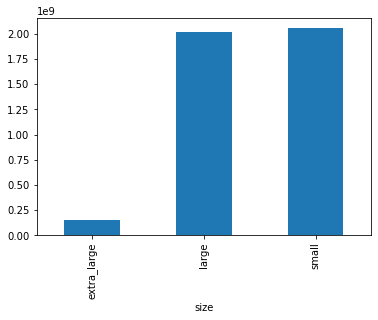

In [5]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size").sum()["nb_sold"]

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

#### Line Plots

- **Line plots** are designed to **visualize** the **relationship** between **two numeric variables**, where each data values is connected to the next one.

- They are especially **useful for visualizing the change** in a number **over time** since each time point is naturally connected to the next time point.

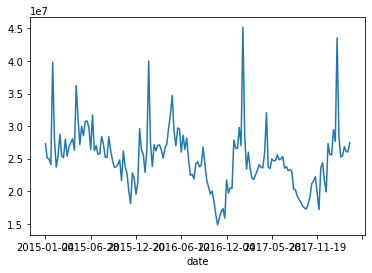

In [6]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date").sum()["nb_sold"]

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

#### Scatter Plots

- **Scatter plots** are ideal for **visualizing relationships** between **numerical variables**. 

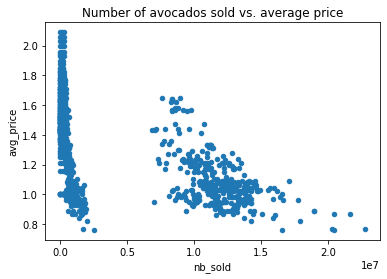

In [7]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

#### Histograms

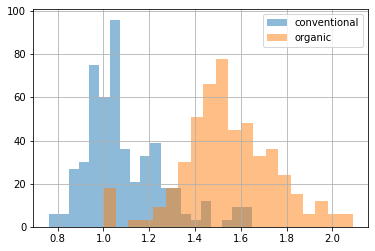

In [4]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

### Handling Missing Values

In [10]:
avocados_2016 = avocados[avocados["year"] == 2016]

# Check individual values for missing values
print(avocados_2016.isna().head(5))

     date   type   year  avg_price   size  nb_sold
52  False  False  False      False  False    False
53  False  False  False      False  False    False
54  False  False  False      False  False    False
55  False  False  False      False  False    False
56  False  False  False      False  False    False


In [11]:
# Check each column for missing values
print(avocados_2016.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


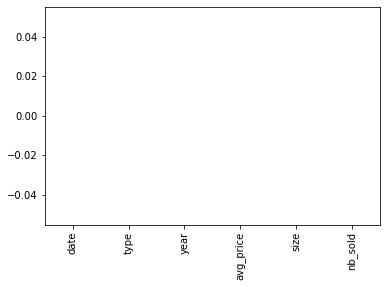

In [12]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

In [13]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


#### Replacing Missing Values

- Use [**`.fillna()`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) to replace the missing values of a `DataFrame`.

### Creating DataFrames

#### List of Dictionaries

- If you create a `DataFrame` using the **list of dictionaries method** you will go through the data **row by row**

In [2]:
import pandas as pd

# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


#### Dictionary of Lists

- If you create a `DataFrame` using the **dictionary of lists method** you will go through the data **column by column**

In [3]:
import pandas as pd

# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


#### From CSV to DataFrame

In [ ]:
# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals.head())

#### From DataFrame to CSV

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")